In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pycatch22 as ct
%matplotlib inline 

In [95]:
df = pd.read_csv("Catch22_Windows.csv")
df.drop(columns = "Unnamed: 0", inplace = True)
feats60 = df[df["Window_Size"] ==60].reset_index()
feats300 = df[df["Window_Size"] ==300].reset_index()

In [96]:
HR = pd.read_csv("HR.csv")

In [97]:
def labeler(data, window_size):
    labels = []
    for i in range(len(data)):
        if i + window_size + 60 <= len(data):
            window = data[i+window_size+5:i+window_size+60]
            if any(value < 100 for value in window):
                labels.append(1)  
            else:
                labels.append(0)
    return labels
        

In [98]:
labels300 = labeler(HR["HR"],300)
labels300 = pd.DataFrame(labels300,columns = ["B"])
labels60 = labeler(HR["HR"],60)
labels60 = pd.DataFrame(labels300,columns = ["B"])

In [99]:
labels300.value_counts()

B
0    81586
1      881
Name: count, dtype: int64

In [100]:
feats300["labels"] = labels300["B"]
feats60["labels"]= labels60["B"]

In [101]:
feats300 = feats300.drop(columns=["index"]).dropna()
feats60 = feats60.drop(columns=["index"]).dropna()

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay,accuracy_score
def rf(df, test_size, random_state, n_estimators):
    X = df.drop('labels', axis=1)
    y = df['labels']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
    confusion_display.plot()
    plt.title('Confusion Matrix - Random Forest')
    plt.show()
    return mse,accuracy




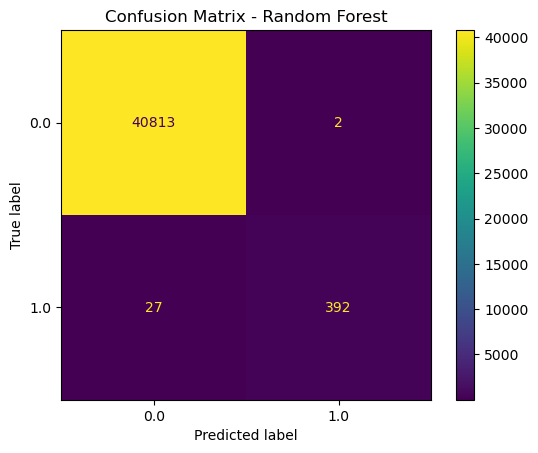

(0.0007033030993840035, 0.999296696900616)

In [104]:
rf(feats300,.5,42,100)

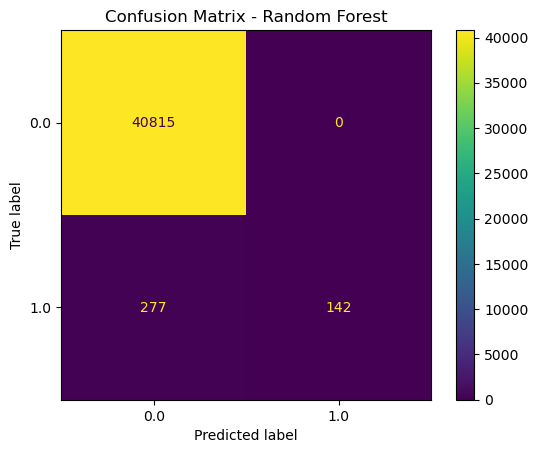

(0.006717757190667895, 0.9932822428093321)

In [105]:
rf(feats60,.5,42,100)